# Exploratory Data Analysis of Stimulus Triggered Averages
*Ian Malone*

#### Load data and check structure

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

filename = 'df_STA_NEIL_2021_01_14'

project = 'NEIL' if 'NEIL' in filename else 'SPARC'
path = 'D:\\Dataframe_CSVs\\%s.csv' % filename

df_sta = pd.read_csv(path)
df_sta.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,Sample,STA_Amplitude
0,N01,999,1,Left,10.0,0,-0.014575
1,N01,999,1,Left,10.0,1,-0.007710
2,N01,999,1,Left,10.0,2,-0.002015
3,N01,999,1,Left,10.0,3,-0.001218
4,N01,999,1,Left,10.0,4,-0.003526


#### For this analysis, we will only keep the right side EMG for SPARC and left side EMG for Neilsen (for now)

In [2]:
if 'NEIL' in path: 
    df_sta = df_sta[df_sta["Side"] == 'Left']
else:
    df_sta = df_sta[df_sta["Side"] == 'Right']

In [3]:
print(df_sta.Animal.unique())
print(df_sta.Day_Postop.unique())
print(df_sta.Day_Stim.unique())
print(df_sta.Side.unique())
print(df_sta.Stim_Amplitude.unique())

['N01' 'N04' 'N05' 'N09' 'N10' 'N11' 'N13' 'N14' 'N15' 'N16' 'N17' 'N19'
 'N20' 'N21' 'N22' 'N23' 'N24' 'N25' 'N26' 'N27' 'N28' 'N29' 'N30' 'N31'
 'N32' 'N33']
[999   2   3   4   5   6   1]
[1 2 3 4 0]
['Left']
[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200. 210. 220. 230. 240. 250. 260. 270. 280.
 290. 300. 310. 320. 330. 340. 350. 360. 370. 380. 390. 400. 410. 420.
 430. 440. 450. 490. 460. 470. 480. 500. 510. 520. 530. 540. 550. 560.
 570. 580. 590. 600. 610. 620. 630. 640. 650. 660. 670. 680. 690. 700.
 710. 720. 730. 740. 750. 760. 770. 780. 790. 800. 810. 820. 830. 840.
 850. 860. 870. 880. 890. 900. 910.  15.  25.  35.  45.  55.  65.  75.
  85.  95. 105. 115. 125. 135. 145. 155. 165. 175. 185. 195. 205. 215.
 225. 235. 245. 255. 265. 275. 285. 295. 305. 315. 325. 335. 345. 355.
 365. 375. 385. 395. 405. 415. 425. 435. 445. 455. 575. 735. 685.]


#### Add 'Time' column based on 'Sample' and a sampling frequency of 5000 Hz

In [4]:
sampling_frequency = 5000 # hertz
df_sta['Time'] = df_sta['Sample']/sampling_frequency # create time column based on samples and sampling frequency
df_sta['Time'] = df_sta['Time']*1000
df_sta = df_sta.drop(columns=['Sample'])
df_sta.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,STA_Amplitude,Time
0,N01,999,1,Left,10.0,-0.014575,0.0
1,N01,999,1,Left,10.0,-0.007710,0.2
2,N01,999,1,Left,10.0,-0.002015,0.4
3,N01,999,1,Left,10.0,-0.001218,0.6
4,N01,999,1,Left,10.0,-0.003526,0.8


#### Define function to add group information to dataframe

In [5]:
### groups for NEIL project
injstim = ['N09','N10','N11','N13','N27','N28','N29','N30']
noinjstim = ['N01','N04','N05','N31','N32','N33','N34','N35'] 
injnostim = ['N14','N15','N16','N21','N22','N23','N36','N37']
noinjnostim = ['N17','N19','N20','N24','N25','N26','N38','N39'] 

### groups for SPARC project
groupa = ['S01', 'S02']
groupb = ['S03', 'S04']
groupc = ['S05', 'S06']

# add animal group information to the dataframe
# make a function so you can apply to multiple dataframes
def add_group(df):
    '''This function adds Group column to dataframe based on Animal column'''
    if project == 'NEIL':
        conditions = [
            (df['Animal'].isin(injstim)),
            (df['Animal'].isin(noinjstim)),
            (df['Animal'].isin(injnostim)),
            (df['Animal'].isin(noinjnostim)) ]
        choices = ['Yes Injury, Yes Stimulation', 'No Injury, Yes Stimulation', 'Yes Injury, No Stimulation', 'No Injury, No Stimulation']
        df['Group'] = np.select(conditions, choices)
    elif project == 'SPARC':
        conditions = [
            (df['Animal'].isin(groupa)),
            (df['Animal'].isin(groupb)),
            (df['Animal'].isin(groupc)) ]
        choices = ['Group A', 'Group B', 'Group C']
        df['Group'] = np.select(conditions, choices)       

#### Plot raw STAs

In [6]:
# sns.set(font_scale=1)
# plt.figure(figsize=(20,12))
# # animal_list = ['N09']
# # & (df_sta['Animal'].isin(animal_list))
# stimlist = [150, 200, 250, 300, 350, 400, 450, 500]

# ## you will need to subset df_sta to only plot certain stimulus amplitudes

# g = sns.FacetGrid(df_sta[(df_sta['Stim_Amplitude'].isin(stimlist))], col='Day_Stim', row='Animal', hue='Stim_Amplitude')
# g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude')
# g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
# g.add_legend()

#### Remove stimulus artifact and re-plot STAs

In [7]:
# remove the stimulus artifact
df_sta_noart = df_sta.copy()
df_sta_noart = df_sta_noart[df_sta_noart['Time'] > 2]

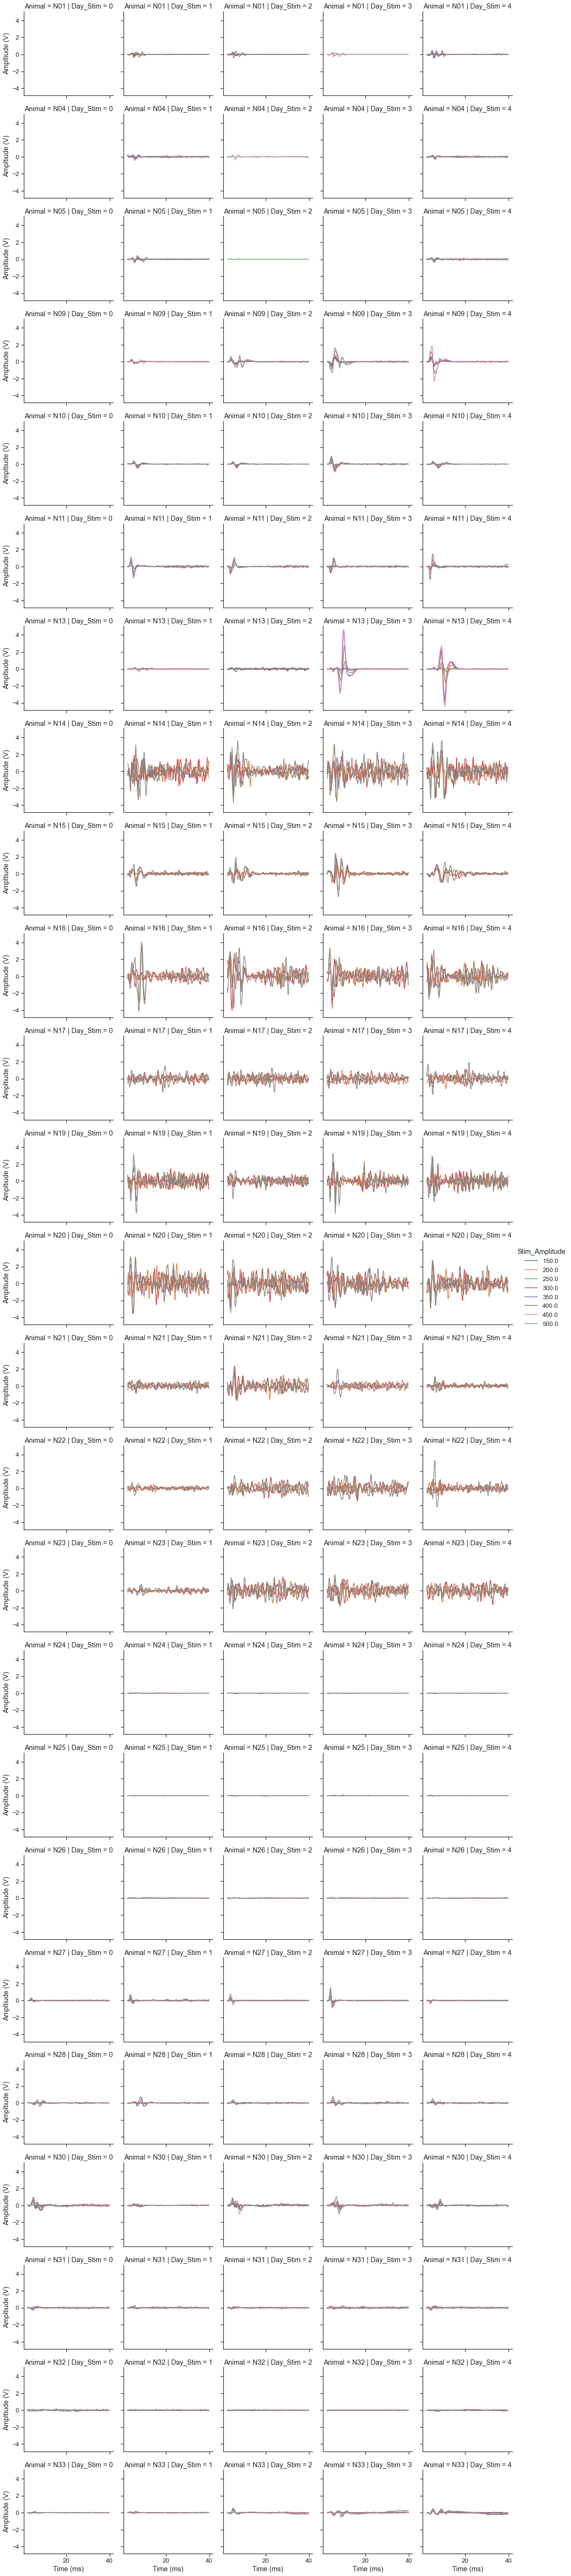

In [132]:
stimlist = [150, 200, 250, 300, 350, 400, 450, 500]

g = sns.FacetGrid(df_sta_noart[(df_sta_noart['Stim_Amplitude'].isin(stimlist))], col='Day_Stim', row='Animal', hue='Stim_Amplitude')
g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude')
g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
g.add_legend()

#### Make example figures for proposal

<Figure size 432x288 with 0 Axes>

<Figure size 2880x1440 with 0 Axes>

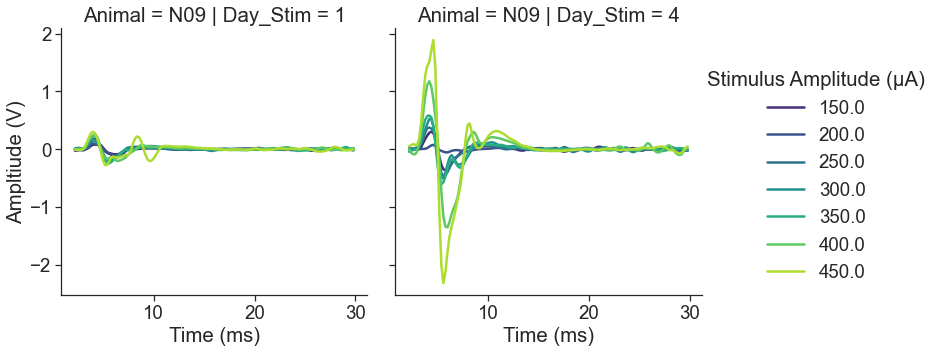

In [206]:
sns.set(font_scale=1.7)
sns.set_style("ticks")
sns.despine()
plt.figure(figsize=(40,20))
stimlist = [150, 200, 250, 300, 350, 400, 450, 500, 550]
animallist = ['N09']
daylist=[1,4]

df_example = df_sta_noart.copy()
df_example = df_example.rename(columns={'Stim_Amplitude':'Stimulus Amplitude (μA)'})

g = sns.FacetGrid(df_example[(df_example['Stimulus Amplitude (μA)'].isin(stimlist)) & (df_example['Time'] < 30) 
                               & (df_example['Animal'].isin(animallist)) 
                               & (df_example['Day_Stim'].isin(daylist))], 
                  col='Day_Stim', row='Animal', palette='viridis', hue='Stimulus Amplitude (μA)', height=5)
g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude', linewidth=2.5)
g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
g.add_legend()
g.savefig("D:\\d1d4_sta.png")

<Figure size 432x288 with 0 Axes>

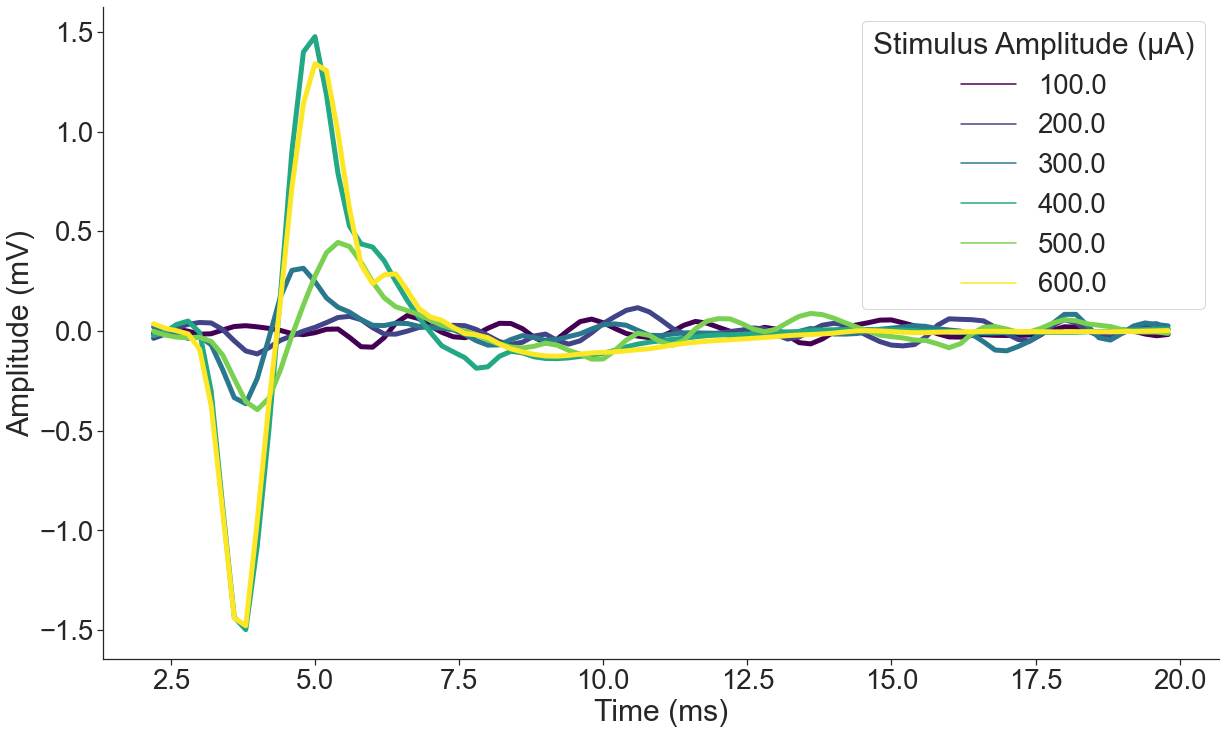

In [203]:
sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.despine()
plt.figure(figsize=(20,12))
stimamplist = [100,200,300,400,500,600]
ax = sns.lineplot(data=df_sta_noart[(df_sta_noart['Animal'] == 'N11') & (df_sta_noart['Day_Stim'] == 4) 
                               & (df_sta_noart['Stim_Amplitude'].isin(stimamplist))
                               & (df_sta_noart['Time'] < 20)], 
             x="Time", y="STA_Amplitude", hue="Stim_Amplitude", palette='viridis', linewidth=5, legend=True)
ax.set(xlabel='Time (ms)', ylabel='Amplitude (mV)')
ax.legend().set_title('Stimulus Amplitude (μA)')
sns.despine()
ax.figure.savefig("D:\\example_sta.png")

#### Based on the plotted STAs, remove unusable data from dataframe

In [118]:
# Delete N29 from dataframe (recordings were badly messed up)

df_sta_noart = df_sta_noart[df_sta_noart['Animal'] != 'N29']
df_sta_noart['Animal'].unique()

array(['N01', 'N04', 'N05', 'N09', 'N10', 'N11', 'N13', 'N14', 'N15',
       'N16', 'N17', 'N19', 'N20', 'N21', 'N22', 'N23', 'N24', 'N25',
       'N26', 'N27', 'N28', 'N30', 'N31', 'N32', 'N33'], dtype=object)

## Peak-to-peak (p2p) amplitude analysis

In [119]:
df_p2p = df_sta_noart[df_sta_noart['Time'] <= 15].copy()
df_p2p.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,STA_Amplitude,Time
11,N01,999,1,Left,10.0,0.014090,2.2
12,N01,999,1,Left,10.0,0.001029,2.4
13,N01,999,1,Left,10.0,-0.011118,2.6
14,N01,999,1,Left,10.0,-0.015516,2.8
15,N01,999,1,Left,10.0,-0.013481,3.0


#### Calclated p2p amplitude

In [120]:
df_p2p = df_p2p.groupby(['Animal', 'Day_Stim', 'Stim_Amplitude'])['STA_Amplitude'].apply(lambda x: x.max() + abs(x.min())).reset_index().rename(columns={'STA_Amplitude':'p2p_amplitude'})
df_p2p.head()

,Animal,Day_Stim,Stim_Amplitude,p2p_amplitude
0,N01,1,10.0,0.035899
1,N01,1,20.0,0.030095
2,N01,1,30.0,0.039529
3,N01,1,40.0,0.060892
4,N01,1,50.0,0.064681


In [121]:
df_p2p.to_csv('D:\\CSV_Outputs\\df_p2p_compare.csv', index=False) 

#### Convert all p2p amplitudes into ratios of the animal's max p2p amplitude over all 4 days

In [161]:
# Convert all p2p amplitudes into ratios of the animal's max p2p amplitude

df_p2p_ratio_max = df_p2p.merge(df_p2p.groupby(['Animal'])['p2p_amplitude'].max(), on='Animal', how='left')
df_p2p_ratio_max['p2p_ratio_max'] = df_p2p_ratio_max['p2p_amplitude_x'] / df_p2p_ratio_max['p2p_amplitude_y']
df_p2p_ratio_max = df_p2p_ratio_max.drop(columns=['p2p_amplitude_x', 'p2p_amplitude_y'])
df_p2p_ratio_max.head()

,Animal,Day_Stim,Stim_Amplitude,p2p_ratio_max
0,N01,1,10.0,0.037266
1,N01,1,20.0,0.031241
2,N01,1,30.0,0.041034
3,N01,1,40.0,0.063211
4,N01,1,50.0,0.067144


#### Add group information to dataframe

In [162]:
add_group(df_p2p_ratio_max)
df_p2p_ratio_max.head()

,Animal,Day_Stim,Stim_Amplitude,p2p_ratio_max,Group
0,N01,1,10.0,0.037266,"No Injury, Yes Stimulation"
1,N01,1,20.0,0.031241,"No Injury, Yes Stimulation"
2,N01,1,30.0,0.041034,"No Injury, Yes Stimulation"
3,N01,1,40.0,0.063211,"No Injury, Yes Stimulation"
4,N01,1,50.0,0.067144,"No Injury, Yes Stimulation"


In [163]:
df_p2p_ratio_max.groupby(['Animal'])['Day_Stim'].unique()

Animal
N01       [1, 2, 3, 4]
N04          [1, 2, 4]
N05          [1, 2, 4]
N09       [1, 2, 3, 4]
N10       [1, 2, 3, 4]
N11       [1, 2, 3, 4]
N13       [1, 2, 3, 4]
N14       [1, 2, 3, 4]
N15       [1, 2, 3, 4]
N16       [1, 2, 3, 4]
N17       [1, 2, 3, 4]
N19       [1, 2, 3, 4]
N20       [1, 2, 3, 4]
N21       [1, 2, 3, 4]
N22       [1, 2, 3, 4]
N23       [1, 2, 3, 4]
N24       [1, 2, 3, 4]
N25       [1, 2, 3, 4]
N26       [1, 2, 3, 4]
N27    [0, 1, 2, 3, 4]
N28    [0, 1, 2, 3, 4]
N30    [0, 1, 2, 3, 4]
N31    [0, 1, 2, 3, 4]
N32    [0, 1, 2, 3, 4]
N33    [0, 1, 2, 3, 4]
Name: Day_Stim, dtype: object

#### For the Neilsen project, exclude day 0

In [164]:
if project == 'NEIL':
    df_p2p_ratio_max = df_p2p_ratio_max[df_p2p_ratio_max['Day_Stim']>0]
    
df_p2p_ratio_max.groupby(['Animal'])['Day_Stim'].unique()

Animal
N01    [1, 2, 3, 4]
N04       [1, 2, 4]
N05       [1, 2, 4]
N09    [1, 2, 3, 4]
N10    [1, 2, 3, 4]
N11    [1, 2, 3, 4]
N13    [1, 2, 3, 4]
N14    [1, 2, 3, 4]
N15    [1, 2, 3, 4]
N16    [1, 2, 3, 4]
N17    [1, 2, 3, 4]
N19    [1, 2, 3, 4]
N20    [1, 2, 3, 4]
N21    [1, 2, 3, 4]
N22    [1, 2, 3, 4]
N23    [1, 2, 3, 4]
N24    [1, 2, 3, 4]
N25    [1, 2, 3, 4]
N26    [1, 2, 3, 4]
N27    [1, 2, 3, 4]
N28    [1, 2, 3, 4]
N30    [1, 2, 3, 4]
N31    [1, 2, 3, 4]
N32    [1, 2, 3, 4]
N33    [1, 2, 3, 4]
Name: Day_Stim, dtype: object

#### Plotting

In [165]:
df_p2p_ratio_max.head()

,Animal,Day_Stim,Stim_Amplitude,p2p_ratio_max,Group
0,N01,1,10.0,0.037266,"No Injury, Yes Stimulation"
1,N01,1,20.0,0.031241,"No Injury, Yes Stimulation"
2,N01,1,30.0,0.041034,"No Injury, Yes Stimulation"
3,N01,1,40.0,0.063211,"No Injury, Yes Stimulation"
4,N01,1,50.0,0.067144,"No Injury, Yes Stimulation"


<Figure size 432x288 with 0 Axes>

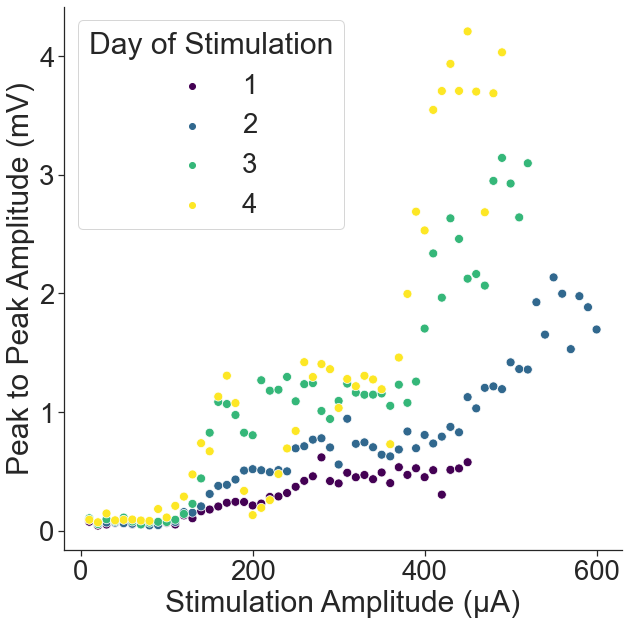

In [202]:
# representative plot for proposal

sns.set(font_scale=2.5)
sns.set_style("ticks")
sns.despine()
plt.figure(figsize=(10,10))
ax = sns.scatterplot(data=df_p2p[df_p2p['Animal']=='N09'], 
                x='Stim_Amplitude', y='p2p_amplitude', palette='viridis', hue='Day_Stim', s=80)
ax.set(xlabel='Stimulation Amplitude (μA)', ylabel='Peak to Peak Amplitude (mV)')
ax.legend().set_title('Day of Stimulation')
sns.despine()
ax.figure.savefig("D:\\representative.png")

<Figure size 432x288 with 0 Axes>

<Figure size 1440x864 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

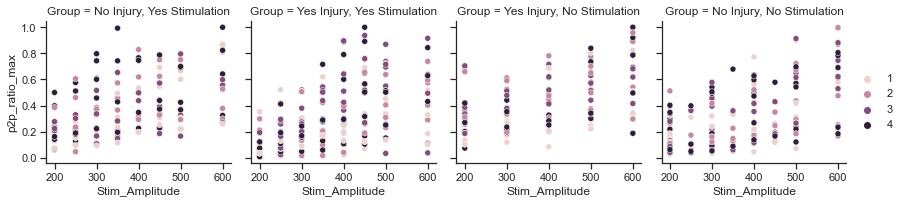

In [167]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500, 600]

sns.set(font_scale=1)
sns.set_style("ticks")
sns.despine()
plt.figure(figsize=(20,12))

plt.figure(figsize=(20,20))
sns.set_style("ticks")
g = sns.FacetGrid(df_p2p_ratio_max[df_p2p_ratio_max['Stim_Amplitude'].isin(stim_amp_list)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "p2p_ratio_max", 'Day_Stim').add_legend())

In [181]:
# sns.lmplot(x="Stim_Amplitude", y="p2p_ratio_max", col="Group", hue="Day_Stim", data=df_p2p_ratio_max,
#            col_wrap=2, ci=None, palette="muted", height=4,
#            scatter_kws={"s": 50, "alpha": 0.3})

### Fit lines by group and day to visualize change over time (and stim amplitude) for each group

<Figure size 1440x864 with 0 Axes>

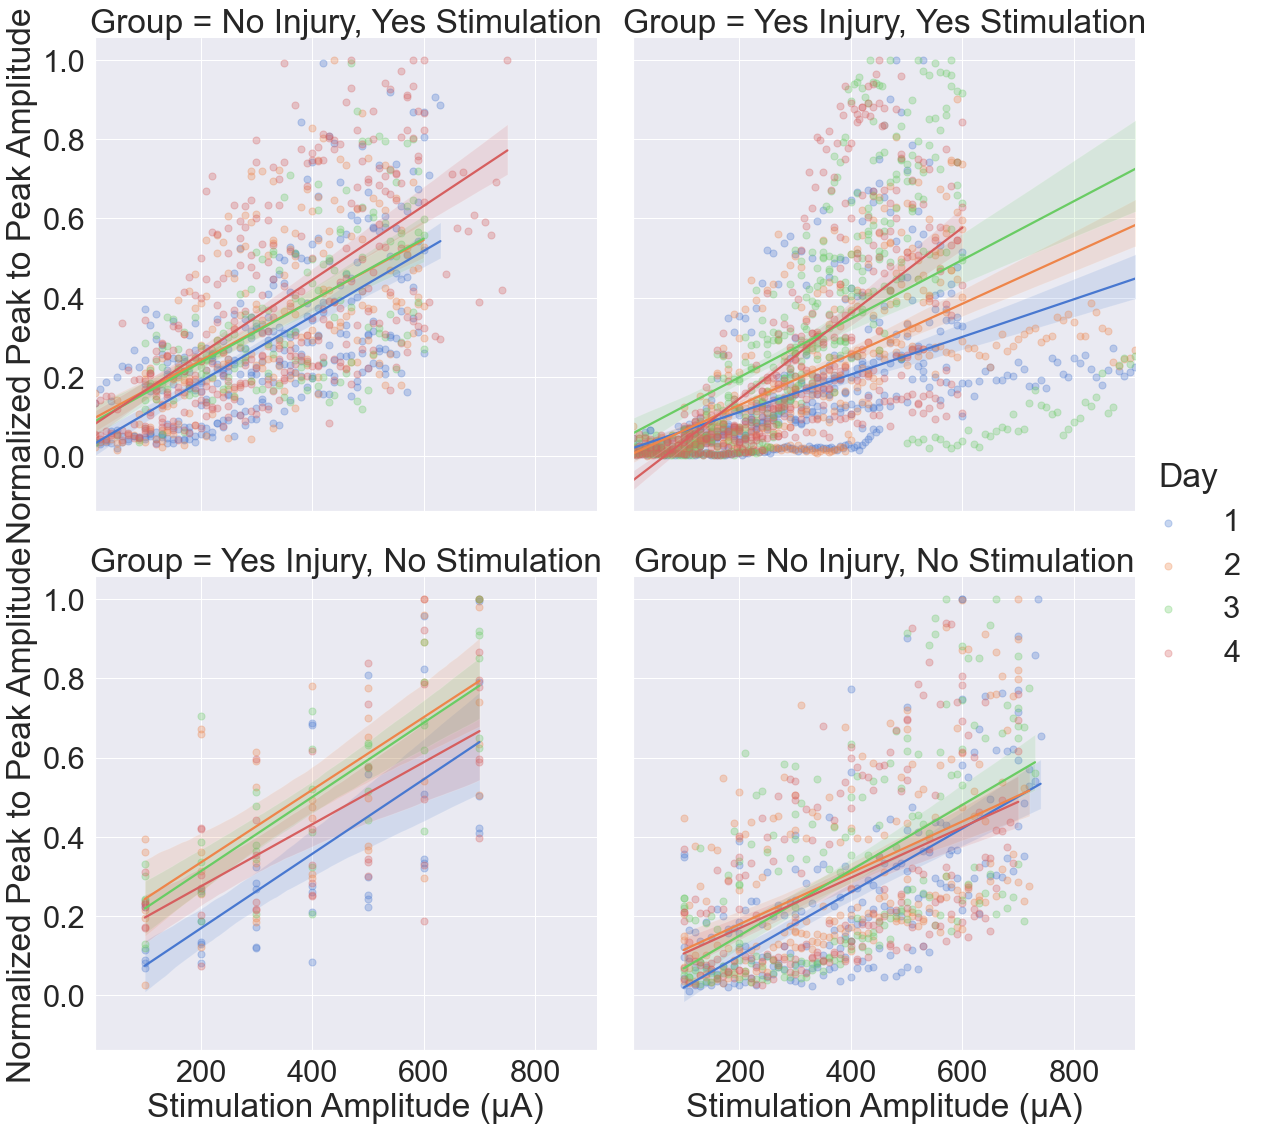

In [189]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2.8)

df_nice_plot = df_p2p_ratio_max.copy()
df_nice_plot = df_nice_plot.rename(columns={"Day_Stim": "Day", "p2p_ratio_max": "Normalized Peak to Peak Amplitude", 
                                                    "Stim_Amplitude": "Stimulation Amplitude (μA)"})
ax = sns.lmplot(x="Stimulation Amplitude (μA)", y="Normalized Peak to Peak Amplitude", col="Group", hue="Day", data=df_nice_plot,
           col_wrap=2, order=1, ci=95, palette="muted", height=8,
           scatter_kws={"s": 50, "alpha": 0.3})
ax.savefig("D:\\breadnbutta.png")

## Peak-to-peak latency analysis (3.75 ms time bins)

In [138]:
df_bin = df_sta_noart[df_sta_noart['Time'] <= 15].copy()
df_bin['Bin'] = pd.cut(df_bin.Time, 
                bins=[0,3.75,7.5,11.25], 
                include_lowest=True, 
                labels=['0-3.75ms','3.75-7.5ms','7.5-11.25ms'])
df_bin = df_bin.dropna()
df_bin.head()

,Animal,Day_Postop,Day_Stim,Side,Stim_Amplitude,STA_Amplitude,Time,Bin
11,N01,999,1,Left,10.0,0.014090,2.2,0-3.75ms
12,N01,999,1,Left,10.0,0.001029,2.4,0-3.75ms
13,N01,999,1,Left,10.0,-0.011118,2.6,0-3.75ms
14,N01,999,1,Left,10.0,-0.015516,2.8,0-3.75ms
15,N01,999,1,Left,10.0,-0.013481,3.0,0-3.75ms


In [139]:
df_p2p_latency = df_bin.copy()
df_p2p_latency = df_p2p_latency.groupby(['Animal', 'Day_Stim', 'Stim_Amplitude', 'Bin'])['STA_Amplitude'].apply(lambda x: x.max() + abs(x.min())).reset_index().rename(columns={'STA_Amplitude':'p2p_amplitude'})
df_p2p_latency.head()

,Animal,Day_Stim,Stim_Amplitude,Bin,p2p_amplitude
0,N01,0,10.0,0-3.75ms,NaN
1,N01,0,10.0,3.75-7.5ms,NaN
2,N01,0,10.0,7.5-11.25ms,NaN
3,N01,0,15.0,0-3.75ms,NaN
4,N01,0,15.0,3.75-7.5ms,NaN


In [140]:
df_p2p_latency = df_p2p_latency.merge(df_p2p_latency.groupby(['Animal'])['p2p_amplitude'].max(), on='Animal', how='left')
df_p2p_latency['p2p_ratio_max'] = df_p2p_latency['p2p_amplitude_x'] / df_p2p_latency['p2p_amplitude_y']
df_p2p_latency = df_p2p_latency.drop(columns=['p2p_amplitude_x', 'p2p_amplitude_y'])
df_p2p_latency.head()

,Animal,Day_Stim,Stim_Amplitude,Bin,p2p_ratio_max
0,N01,0,10.0,0-3.75ms,NaN
1,N01,0,10.0,3.75-7.5ms,NaN
2,N01,0,10.0,7.5-11.25ms,NaN
3,N01,0,15.0,0-3.75ms,NaN
4,N01,0,15.0,3.75-7.5ms,NaN


In [141]:
add_group(df_p2p_latency)
df_p2p_latency.head()

,Animal,Day_Stim,Stim_Amplitude,Bin,p2p_ratio_max,Group
0,N01,0,10.0,0-3.75ms,NaN,"No Injury, Yes Stimulation"
1,N01,0,10.0,3.75-7.5ms,NaN,"No Injury, Yes Stimulation"
2,N01,0,10.0,7.5-11.25ms,NaN,"No Injury, Yes Stimulation"
3,N01,0,15.0,0-3.75ms,NaN,"No Injury, Yes Stimulation"
4,N01,0,15.0,3.75-7.5ms,NaN,"No Injury, Yes Stimulation"


In [142]:
df_p2p_latency_mean = df_p2p_latency.groupby(['Group', 'Day_Stim', 'Stim_Amplitude', 'Bin'])['p2p_ratio_max'].agg('mean').reset_index().rename(columns={'p2p_ratio_max':'mean_p2p_ratio_max'}).copy()
df_p2p_latency_mean.head()

,Group,Day_Stim,Stim_Amplitude,Bin,mean_p2p_ratio_max
0,"No Injury, No Stimulation",0,10.0,0-3.75ms,NaN
1,"No Injury, No Stimulation",0,10.0,3.75-7.5ms,NaN
2,"No Injury, No Stimulation",0,10.0,7.5-11.25ms,NaN
3,"No Injury, No Stimulation",0,15.0,0-3.75ms,NaN
4,"No Injury, No Stimulation",0,15.0,3.75-7.5ms,NaN


In [143]:
df_p2p_latency_mean['Day_Stim'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

#### Plotting

In [151]:
stimamps = [200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400]
days = [1, 4]

df_plot = df_p2p_latency_mean[df_p2p_latency_mean['Stim_Amplitude'].isin(stimamps) & df_p2p_latency['Day_Stim'].isin(days)].copy()
df_plot = df_plot.rename(columns={"Bin": "Time Bin", "mean_p2p_ratio_max": "Mean Peak-to-Peak Amplitude (mV)", 'Day_Stim':'Day'})

<ipython-input-151-f1c763ad1be1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_plot = df_p2p_latency_mean[df_p2p_latency_mean['Stim_Amplitude'].isin(stimamps) & df_p2p_latency['Day_Stim'].isin(days)].copy()


C:\Users\Ian\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


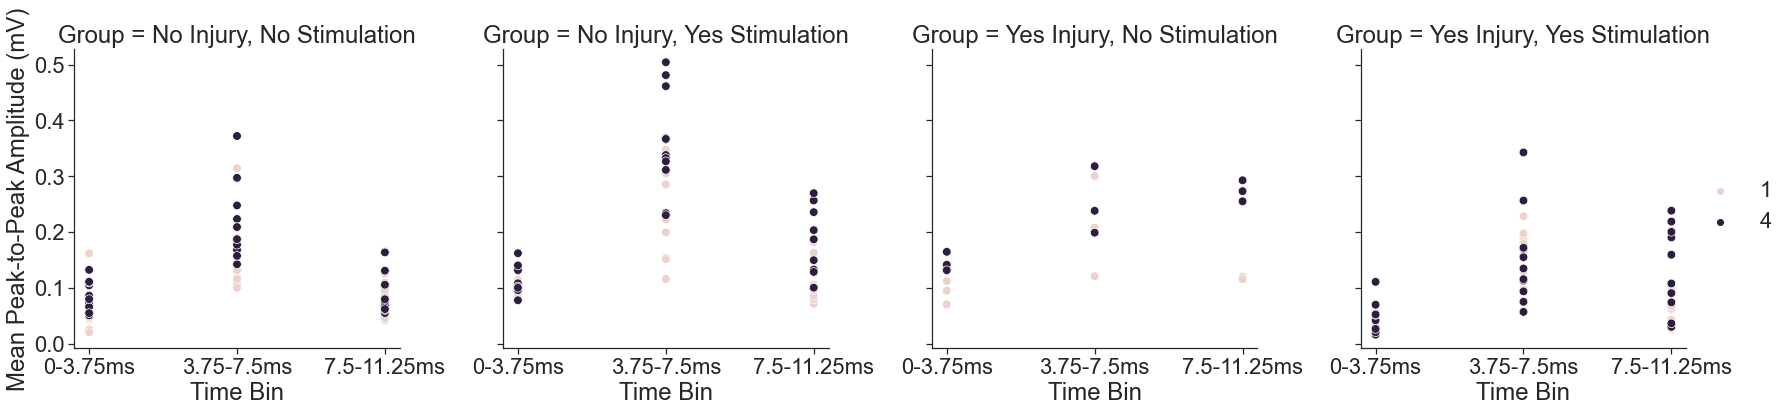

In [145]:
sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_plot, col="Group", size=6, palette='tab10')
g = (g.map(sns.scatterplot, "Time Bin", "Mean Peak-to-Peak Amplitude (mV)", 'Day', s=75).add_legend())
plt.savefig('D:\\test.png')

## Area under the curve analysis

## Area under the curve latency analysis (3.75 ms time bins)

In [ ]:
df_auc_latency = df_bin.copy()

In [147]:
df_auc['Day_Stim'].unique()

NameError: name 'df_auc' is not defined

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
sns.set_style("ticks")
g = sns.FacetGrid(df_auc, col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "STA_AUC", 'Day_Stim').add_legend())

NameError: name 'df_auc' is not defined

<Figure size 1440x1440 with 0 Axes>

### Calculate statistics on the plotted lines above
##### slope, intercept, r_value, p_value, std_err

Make dataframes for each group. This will make it easier to subset in the next step.

In [ ]:
# group: no injury, no stimulation
df_nn = df_ratio_max[df_ratio_max['Group'] == 'No Injury, No Stimulation']
df_nn1 = df_nn[df_nn['Day_Stim'] == 1]
df_nn2 = df_nn[df_nn['Day_Stim'] == 2]
df_nn3 = df_nn[df_nn['Day_Stim'] == 3]
df_nn4 = df_nn[df_nn['Day_Stim'] == 4]

# group: no injury, yes stimulation
df_ny = df_ratio_max[df_ratio_max['Group'] == 'No Injury, Yes Stimulation']
df_ny1 = df_ny[df_ny['Day_Stim'] == 1]
df_ny2 = df_ny[df_ny['Day_Stim'] == 2]
df_ny3 = df_ny[df_ny['Day_Stim'] == 3]
df_ny4 = df_ny[df_ny['Day_Stim'] == 4]

# group: yes injury, no stimulation
df_yn = df_ratio_max[df_ratio_max['Group'] == 'Yes Injury, No Stimulation']
df_yn1 = df_yn[df_yn['Day_Stim'] == 1]
df_yn2 = df_yn[df_yn['Day_Stim'] == 2]
df_yn3 = df_yn[df_yn['Day_Stim'] == 3]
df_yn4 = df_yn[df_yn['Day_Stim'] == 4]

# group: yes injury, yes stimulation
df_yy = df_ratio_max[df_ratio_max['Group'] == 'Yes Injury, Yes Stimulation']
df_yy1 = df_yy[df_yy['Day_Stim'] == 1]
df_yy2 = df_yy[df_yy['Day_Stim'] == 2]
df_yy3 = df_yy[df_yy['Day_Stim'] == 3]
df_yy4 = df_yy[df_yy['Day_Stim'] == 4]

In [ ]:
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

df = df_yy4

X = df['Stim_Amplitude']
y = df['p2p_ratio_max']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

### Apply linear mixed effects model (random slopes) to data plotted above

In [ ]:
df_ratio_max.head()

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

md = sm.MixedLM.from_formula("p2p_ratio_max ~ Stim_Amplitude + Day_Stim", df_ratio_max, groups=df_ratio_max["Group"])

mdf = md.fit()

print(mdf.summary())

### Calculate area under the stimulus triggered average curves 
##### For each current amplitude, each animal, and each day

In [ ]:
#### KEEP THIS. MAY SPLIT INTO TIME BINS IN FUTURE

# bins = [0.001, 0.004, 0.007, 0.010, 0.013, 0.0298] # define bins
# labels = ['1 to 4 ms', '4 to 7 ms', '7 to 10 ms', '10 to 13 ms', '13 to 29.8 ms'] # define bin labels
# #labels = [1, 2, 3, 4, 5]

# df_bin = df_sta_sub_norm.copy()
# df_bin['Time_Bin'] = pd.cut(df_bin['Time'], bins, labels=labels, right=False) # add Time_Bin column to dataframe
# df_bin = df_bin.reindex(columns=['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Time', 'Time_Bin', 'STA_Scaled'])
# df_bin.rename(columns = {'Time_Bin':'Bin'}, inplace = True) 
# df_bin = df_bin[df_bin['Bin'] != '13 to 29.8 ms'] # drop all data 13 ms after the stimulation
# df_bin.head()


# from scipy import integrate

# df_auc = df_bin.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Bin'])['STA_Scaled'].apply(integrate.simps).reset_index()
# df_auc.rename(columns = {'STA_Scaled':'STA_AUC'}, inplace = True)
# df_auc = df_auc.dropna()
# df_auc.head()

In [ ]:
df_noisefloor_auc = df_sta_noart.copy()
df_noisefloor_auc = df_noisefloor_auc[(df_noisefloor_auc['Time'] > 20.0)]
df_noisefloor_auc.head()

In [ ]:
df_auc = df_sta_noart.copy()
df_auc = df_auc[(df_auc['Time'] > 2.0) & (df_auc['Time'] < 10.2)]
df_auc.tail()

In [ ]:
import numpy as np
# define animal groups
injstim = ['N09','N10','N11','N13','N27','N28','N29','N30']
noinjstim = ['N01','N04','N05','N31','N32','N33','N34','N35'] 
injnostim = ['N14','N15','N16','N21','N22','N23','N36','N37']
noinjnostim = ['N17','N19','N20','N24','N25','N26','N38','N39'] 

# add animal group information to the dataframe
conditions = [
    (df_auc['Animal'].isin(injstim) ),
    (df_auc['Animal'].isin(noinjstim) ),
    (df_auc['Animal'].isin(injnostim) ),
    (df_auc['Animal'].isin(noinjnostim) )]
choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']
df_auc['Group'] = np.select(conditions, choices)
df_auc.head()

In [ ]:
df_noisefloor_peak = df_noisefloor_auc.copy()
df_noisefloor_peak = df_noisefloor_peak.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude'])['STA_Amplitude'].agg('mean').reset_index()
df_noisefloor_peak = df_noisefloor_peak.rename(columns={"STA_Amplitude": "STA_Noise_Floor"})
df_noisefloor_peak.head()

In [ ]:
df_noisefloor_auc = df_noisefloor_auc.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude'])['STA_Amplitude'].agg('mean').reset_index()
df_noisefloor_auc['STA_Amplitude'] = df_noisefloor_auc['STA_Amplitude'] * 7.8 # 7.8 because the length of the STA is 7.8 ms
df_noisefloor_auc = df_noisefloor_auc.rename(columns={"STA_Amplitude": "STA_Noise_Floor"})
df_noisefloor_auc.head()

In [ ]:
df_peak = df_auc.copy()
df_peak = df_peak.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude', 'Group'])['STA_Amplitude'].agg('max').reset_index()
df_peak.rename(columns = {'STA_Amplitude':'STA_Peak'}, inplace = True)
df_peak = df_peak.drop(columns=['Day_Postop', 'Side'])
df_peak.head()

We now need to integrate the stimulus triggered average curves to find the area beneath them. We can then compare these areas under the curve (AUCs) between groups, days, stimulus intensities, etc.

The trapezoidal rule provides a simple way to integrate a function but typically has much larger error than Simpson's rule without saving significant compute time. We will use Simpson's rule.

In [ ]:
from scipy import integrate

df_auc = df_auc.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude', 'Group'])['STA_Amplitude'].apply(integrate.simps).reset_index()
df_auc.rename(columns = {'STA_Amplitude':'STA_AUC'}, inplace = True)
df_auc = df_auc.drop(columns=['Day_Postop', 'Side'])
df_auc.head()

In [ ]:
# df_peak.to_csv('D:\\df_peak_raw.csv', index=False) 
# df_auc.to_csv('D:\\df_auc_raw.csv', index=False) 

In [ ]:
# one hot encoding for injury condition and stimulation condition

choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']

def injury(row):
    if (row['Group'] == 'Injury and Stimulation') | (row['Group'] == 'Injury and No Stimulation'):
        val = 1
    elif (row['Group'] == 'No Injury and Stimulation') | (row['Group'] == 'No Injury and No Stimulation'):
        val = 0
    else:
        val = -1
    return val

def stimulation(row):
    if (row['Group'] == 'Injury and Stimulation') | (row['Group'] == 'No Injury and Stimulation'):
        val = 1
    elif (row['Group'] == 'Injury and No Stimulation') | (row['Group'] == 'No Injury and No Stimulation'):
        val = 0
    else:
        val = -1
    return val

In [ ]:
# percent change from noise floor to peak for each day

df_peak_change = df_peak.copy()
df_peak_change["STA_Noise_Floor"] = df_noisefloor_peak["STA_Noise_Floor"]
df_peak_change['STA_Percent_Noise_Floor'] = ((df_peak_change['STA_Peak'].sub(df_peak_change["STA_Noise_Floor"])).div(df_peak_change["STA_Noise_Floor"])).mul(100)
df_peak_change.head()

In [ ]:
df_peak_change['Injury'] = df_peak_change.apply(injury, axis=1)
df_peak_change['Stimulation'] = df_peak_change.apply(stimulation, axis=1)
df_peak_change = df_peak_change.drop(columns=['STA_Peak', 'STA_Noise_Floor'])
df_peak_change.rename(columns = {'STA_Percent_Noise_Floor':'Peak_Percent_Noise_Floor'}, inplace = True) 
df_peak_change.head()


In [ ]:
df_mean_day_peak_change = df_peak_change.copy()
df_mean_day_peak_change = df_mean_day_peak_change.groupby(['Day_Stim', 'Stim_Amplitude', 'Group'])['Peak_Percent_Noise_Floor'].agg('mean').reset_index()
df_mean_day_peak_change = df_mean_day_peak_change.rename(columns={'Peak_Percent_Noise_Floor':'Mean_Peak_Percent_Noise_Floor'})
df_mean_day_peak_change.head()

In [ ]:
stim_amp_list = [200, 250, 300, 350, 400, 450, 500, 600]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
# sns.set(font_scale=2)
sns.set_style("ticks")
g = sns.FacetGrid(df_mean_day_peak_change[(df_mean_day_peak_change['Stim_Amplitude'].isin(stim_amp_list)) & (df_mean_day_peak_change['Day_Stim']>0)], col="Group")
g = (g.map(sns.scatterplot, "Stim_Amplitude", "Mean_Peak_Percent_Noise_Floor", 'Day_Stim').add_legend())


In [ ]:
# percent change from noise floor to auc for each day

df_day_auc_change = df_auc.copy()
df_day_auc_change["STA_Noise_Floor"] = df_noisefloor_auc["STA_Noise_Floor"]
df_day_auc_change['STA_Percent_Noise_Floor'] = ((df_day_auc_change['STA_AUC'].sub(df_day_auc_change["STA_Noise_Floor"])).div(df_day_auc_change["STA_Noise_Floor"])).mul(100)
df_day_auc_change.head()

In [ ]:
df_day_auc_change['Injury'] = df_day_auc_change.apply(injury, axis=1)
df_day_auc_change['Stimulation'] = df_day_auc_change.apply(stimulation, axis=1)
#df_day_pchange = df_day_pchange.drop(columns=['Day_Postop', 'Side', 'STA_AUC', 'STA_Noise_Floor'])
#df_day_pchange.to_csv('D:\\df_abstract.csv', index=False) 
# df_day_pchange.head(50)
df_day_auc_change = df_day_auc_change.drop(columns=['STA_AUC', 'STA_Noise_Floor'])
df_day_auc_change.rename(columns = {'STA_Percent_Noise_Floor':'AUC_Percent_Noise_Floor'}, inplace = True) 

df_day_auc_change.head()

In [ ]:
df_cluster = df_day_auc_change.copy()
df_cluster = df_cluster.drop(columns=['Injury','Stimulation'])
df_cluster = df_cluster.set_index('Animal')
df_cluster = df_cluster[df_cluster['Stim_Amplitude'] < 800]
# df_cluster['AnimalID'] = [int(x.strip()[-2:]) for x in df_cluster['Animal']]
# df_cluster = df_cluster.drop(columns=['Animal'])
# df_cluster = df_cluster[(df_cluster['Day_Stim'] == 3) | (df_cluster['Day_Stim'] == 4)]
# df_cluster = df_cluster[(df_cluster['Stim_Amplitude'] > 299) & (df_cluster['Stim_Amplitude'] < 510)]
# df_cluster = df_cluster.groupby(['AnimalID', 'Injury', 'Stimulation', ])['AUC_Percent_Noise_Floor'].agg('mean').reset_index()
df_cluster.head(30)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = df_cluster['Day_Stim']
y = df_cluster['Stim_Amplitude']
z = df_cluster['AUC_Percent_Noise_Floor']

ax.set_xlabel("Day_Stim")
ax.set_ylabel("Stim_Amplitude")
ax.set_zlabel("AUC_Percent_Noise_Floor")

ax.scatter(x, y, z)

plt.show()

In [ ]:
df_cluster.head(50)

In [ ]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                     linkage='complete').fit(df_cluster)
Z = hierarchy.linkage(model.children_, 'complete')
plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean', 
                                     linkage='complete').fit(df_day_auc_change)


In [ ]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

Z = hierarchy.linkage(clustering.children_, 'complete')


plt.figure(figsize=(20,10))
dn = hierarchy.dendrogram(Z)

In [ ]:
df_day_auc_change.head()

In [ ]:
df_cluster = df_day_auc_change[df_day_auc_change['Stim_Amplitude']]

In [ ]:
df_timeseries = df_auc.copy()
df_timeseries['Injury'] = df_timeseries.apply(injury, axis=1)
df_timeseries['Stimulation'] = df_timeseries.apply(stimulation, axis=1)
df_timeseries.head()

In [ ]:


# from scipy.cluster.hierarchy import dendrogram

# def plot_dendrogram(model, **kwargs):
#     # Create linkage matrix and then plot the dendrogram

#     # create the counts of samples under each node
#     counts = np.zeros(model.children_.shape[0])
#     n_samples = len(model.labels_)
#     for i, merge in enumerate(model.children_):
#         current_count = 0
#         for child_idx in merge:
#             if child_idx < n_samples:
#                 current_count += 1  # leaf node
#             else:
#                 current_count += counts[child_idx - n_samples]
#         counts[i] = current_count

#     linkage_matrix = np.column_stack([model.children_, model.distances_,
#                                       counts]).astype(float)

#     # Plot the corresponding dendrogram
#     dendrogram(linkage_matrix, **kwargs)
    
# plt.title('Hierarchical Clustering Dendrogram')
# # plot the top three levels of the dendrogram
# plot_dendrogram(clustering, truncate_mode='level', p=3)
# plt.xlabel("Number of points in node (or index of point if no parenthesis).")
# plt.show()

In [ ]:
df_auc = df_sta_noart[df_sta_noart['Time'] <= 15].copy()
add_group(df_auc)
df_auc.head()

In [ ]:
df_auc['STA_Amplitude'] = df_auc['STA_Amplitude'].abs()

In [ ]:
df_auc.head()

In [ ]:
from scipy import integrate

df_auc = df_auc.groupby(['Animal', 'Day_Postop', 'Day_Stim', 'Side', 'Stim_Amplitude', 'Group'])['STA_Amplitude'].apply(integrate.simps).reset_index()
df_auc.rename(columns = {'STA_Amplitude':'STA_AUC'}, inplace = True)
df_auc.head()

In [ ]:
df_auc.to_csv('D:\\CSV_Outputs\\df_auc.csv', index=False) 


In [ ]:
# # these are dataframes that erica requested for abstract

# df_peak_400 = df_peak_change.copy()
# df_peak_day4 = df_peak_change.copy()
# df_auc_400 = df_day_pchange.copy()
# df_auc_day4 = df_day_pchange.copy()

# df_peak_400 = df_peak_400[df_peak_400['Stim_Amplitude'] == 400]
# df_peak_day4 = df_peak_day4[df_peak_day4['Day_Stim'] == 4]
# df_auc_400 = df_auc_400[df_auc_400['Stim_Amplitude'] == 400]
# df_auc_day4 = df_auc_day4[df_auc_day4['Day_Stim'] == 4]

# df_peak_400.to_csv('D:\\df_peak_400.csv', index=False) 
# df_peak_day4.to_csv('D:\\df_peak_day4.csv', index=False) 
# df_auc_400.to_csv('D:\\df_auc_400.csv', index=False) 
# df_auc_day4.to_csv('D:\\df_auc_day4.csv', index=False) 

# df_peak_400_day4 = df_peak_400.copy()
# df_peak_400_day4 = df_peak_400_day4[df_peak_400_day4['Day_Stim'] == 4]

# df_auc_400_day4 = df_auc_400.copy()
# df_auc_400_day4 = df_auc_400_day4[df_auc_400_day4['Day_Stim'] == 4]

# df_peak_400_day4.to_csv('D:\\df_peak_400_day4.csv', index=False) 
# df_auc_400_day4.to_csv('D:\\df_auc_400_day4.csv', index=False) 

# df_auc = df_day_pchange.copy()
# df_peak = df_peak_change.copy()
# df_auc.to_csv('D:\\df_auc.csv', index=False) 
# df_peak.to_csv('D:\\df_peak.csv', index=False) 

# CODE BELOW THIS NEEDS TO BE INTEGRATED TO CODE ABOVE

In [ ]:
# # function to calculate percent change
# def perc_change_from_d4(df, day):
#     return ((df[str(day)].sub(df['4'])).div(df['4'])).mul(100)

In [ ]:
# ### changed function above to take df arg

# df_auc_pchange = df_auc.pivot_table(index=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], 
#                     columns='Day', 
#                     values='STA_AUC').reset_index()

# for n in np.arange(6,20,2):
#     df_auc_pchange["Day 4 to Day %s" % n] = perc_change_from_d4(n)

# df_auc_pchange = df_auc_pchange.drop(df_auc_pchange.columns[5:13], axis=1)
# df_auc_pchange.head()

In [ ]:
# df_auc_pchange = pd.melt(df_auc_pchange, id_vars=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], var_name='Days', value_name='Percent_Change')
# df_auc_pchange.head()

In [ ]:
# df_auc_pchange[(df_auc_pchange['Group'] == 'Group C') & (df_auc_pchange['Days'] == 'Day 4 to Day 16') & (df_auc_pchange['Animal'] == 'S05')].head(50)

In [ ]:
# # all the bar plots
# sns.set(font_scale=1.5)
# g = sns.FacetGrid(df_auc_pchange, col="Days", row='Bin')
# g.map(sns.barplot, "Group", "Percent_Change", 'Stim_Amplitude')

In [ ]:
# day_range = 'Day 4 to Day 18'

# plt.figure(figsize=(20,12))
# sns.set(font_scale=2)
# sns.set_style("ticks")
# ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
# ax.set_title(project + ': Percent Change AUC ' + day_range)
# ax.set_ylabel('Percent Change STA AUC')

### Other analyses

- Peak to peak from stimulus triggered average for each current amplitude, each animal, each day
- Latency from stimulus pulse to stimulus triggered average for each current amplitude, each animal, each day
- Time domains of stimulus triggered average
- Differences in any of these parameters based on time of day?
- How are we going to present the impedance data in the Neilsen paper? I’m still not clear on this.
- Additional things we can look at (e.g., wavelet, FFT, HMM, etc.)
- Look in manuscript file for notes on ideas. Also look in Daily Notes on OneNote for papers that did EMG analysis well.
- Add information on time of day and stimulus amplitude from Neurochip